In [114]:
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns

# Read Date

In [115]:
path='data/output1.csv'
df_data=pd.read_csv(path,encoding ='UTF-8')
df=df_data.copy()
df

,Unnamed: 0,index,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,is_food
0,0,1,7,27,Jinsei Sushi,4.7,63,"Sushi, Asian, Japanese",1,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,1
1,1,2,14,51,Panera 521 Fieldstown Road,4.6,44,"Breakfast and Brunch, salad, Sandwich, Family ...",1,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,0
2,2,3,16,88,Jeni's Splendid Ice Cream Pepper Place,5.0,20,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",3,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950,1
3,3,4,19,30,Falafel Cafe,4.9,48,"Middle Eastern, Mediterranean, Vegetarian, Gre...",1,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,1
4,4,5,20,40,MrBeast Burger 838 Odum Road,3.7,19,"American, Burgers, Sandwich",2,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19113,19113,19114,40223,54,Mangia la pasta! 5610 N Interstate Hwy 35,4.8,500,"Pasta, Comfort Food, Italian, Group Friendly",1,"5610 N I35, Austin, TX, 78751",78751,30.316248,-97.708441,0
19114,19114,19115,40224,53,Wholly Cow Burgers S Lamar,4.6,245,"American, Burgers, Breakfast and Brunch, Aller...",1,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821,1
19115,19115,19116,40225,52,EurAsia Ramen 3,4.7,293,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",1,"5222 Burnet Road, Austin, TX, 78756",78756,30.324290,-97.740200,0
19116,19116,19117,40226,51,Austin's Habibi 5th St,4.7,208,"Mediterranean, Gluten Free Friendly, Allergy F...",2,"817 W 5th St, Austin, TX, 78703",78703,30.269580,-97.753110,0


In [116]:
df=df.drop(columns=['Unnamed: 0','index','id'])

In [157]:
df_1 = df[(df.is_food == 1) & (df.price_range == 1)].sample(n=1885)
df_2 = df[(df.is_food == 1) & (df.price_range >1)].sample(n=1885)
df_3 = df[(df.is_food == 0) & (df.price_range == 1)].sample(n=1885)
df_4 = df[(df.is_food == 0) & (df.price_range >1)].sample(n=1885)
data=pd.concat([df_1,df_2,df_3,df_4])
data


,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,is_food
13236,9,Wing &amp; Things,3.8,11,"Thai, Asian, Noodles",1,"1713 Wilson Blvd, Arlington, VA, 22209",22209,38.894250,-77.078650,1
18963,16,Red Robin Gourmet Burgers 5601 Brodie Lane,4.5,86,"American, Burgers, Chicken",1,"5601 Brodie Lane, Sunset Valley, TX, 78745",78745,30.226790,-97.821270,1
9112,10,For Five Coffee Roasters Alexandria,4.9,62,"Coffee and Tea, American, Breakfast and Brunch",1,"1800 Diagonal Road, Alexandria, VA, 22314",22314,38.805852,-77.060430,1
2724,166,Setsuko Pastry at Modern Japanese Cuisine,4.7,10,"Desserts, Japanese, Pastry",1,"6108 Phinney Ave N, Seattle, WA, 98103",98103,47.673496,-122.354108,1
17686,128,Great American Cookie &amp; Marble Slab Cream...,4.7,24,"Bakery, Desserts, Comfort Food, Pastry",1,"2705 Heritage Trace Pkwy, Fort Worth, TX, 76177",76177,32.915439,-97.322261,1
...,...,...,...,...,...,...,...,...,...,...,...
6011,27,Sonic 10421 North Newport Highway,4.5,197,"American, Fast Food, Burgers",2,"10421 North Newport Highway, Spokane, WA, 99218",99218,47.753422,-117.398916,0
4661,4,Fogo de Chao Portland,4.6,38,"Steak, Brazilian",2,"930 SW Sixth Ave, Portland, OR, 97204",97204,45.517144,-122.679329,0
10277,186,Fifty West Cafe,4.5,14,"Sandwich, Salads, Breakfast and Brunch, Burger...",2,"3975 Fair Ridge Dr, Fairfax, VA, 22033",22033,38.872750,-77.368820,0
5317,264,A+ Hong Kong Kitchen,4.9,20,"Seafood, Vegetarian Friendly, Chinese, Cantone...",2,"419 6th Ave S, Seattle, WA, 98104",98104,47.598534,-122.326582,0


In [118]:
df.describe()

,position,score,ratings,price_range,lat,lng,is_food
count,19118.000000,19118.000000,19118.000000,19118.000000,19118.000000,19118.000000,19118.000000
mean,70.211319,4.558437,77.769223,1.245266,39.836742,-96.972796,0.410032
std,70.609928,0.296210,73.948624,0.445546,6.001526,18.556527,0.491852
min,1.000000,1.300000,10.000000,1.000000,0.000000,-123.011380,0.000000
25%,13.000000,4.400000,26.000000,1.000000,36.914637,-119.176386,0.000000
50%,44.000000,4.600000,54.000000,1.000000,38.931660,-96.701912,0.000000
75%,109.000000,4.800000,102.000000,1.000000,45.616668,-77.460692,1.000000
max,300.000000,5.000000,500.000000,4.000000,48.936240,0.000000,1.000000


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19118 entries, 0 to 19117
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   position      19118 non-null  int64  
 1   name          19118 non-null  object 
 2   score         19118 non-null  float64
 3   ratings       19118 non-null  int64  
 4   category      19118 non-null  object 
 5   price_range   19118 non-null  int64  
 6   full_address  19118 non-null  object 
 7   zip_code      19118 non-null  object 
 8   lat           19118 non-null  float64
 9   lng           19118 non-null  float64
 10  is_food       19118 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.6+ MB


### Mean of three Type

In [120]:
import statistics as sts
A=df.score
print('mean is',sts.mean(A))
print('geometric mean is',sts.geometric_mean(A))
print('harmonic mean is',sts.harmonic_mean(A))
print('mode is',sts.mode(A))
print('median is',sts.median(A))
print('The third quartile is',sts.quantiles(A,n=4))
print('The second quartile is',sts.quantiles(A,n=3))

mean is 4.558437075007846
geometric mean is 4.547872946039448
harmonic mean is 4.536035669680859
mode is 4.7
median is 4.6
The third quartile is [4.4, 4.6, 4.8]
The second quartile is [4.5, 4.7]


# visualization

([<matplotlib.axis.XTick at 0x2a547c4c0>], [Text(1, 0, 'sample')])

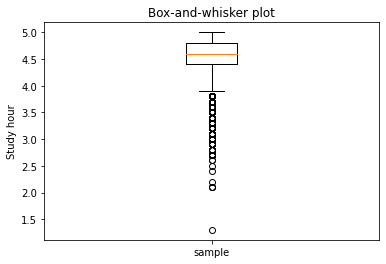

In [121]:
import matplotlib.pyplot as plt
#plt.boxplot(df['Hours'].values)
plt.boxplot(df.score)
plt.title('Box-and-whisker plot')
plt.ylabel('Study hour')
plt.xticks([1],["sample"])

<AxesSubplot: xlabel='lng', ylabel='lat'>

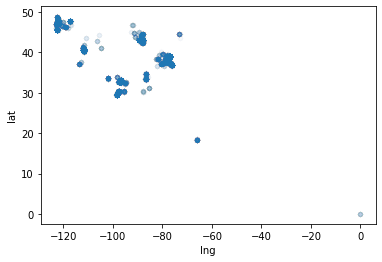

In [122]:
#plt.rcParams['figure.figsize']=(12.8, 7.2)
df.plot(kind="scatter", x="lng", y="lat",alpha=0.01)

In [123]:
text=df.category.str.split(', ',expand=True).stack().value_counts()
nameData=pd.DataFrame(text.index)
nameData

,0
0,American
1,Fast Food
2,Burgers
3,Family Meals
4,Healthy
...,...
290,Bistro
291,Chinese: Noodles &amp; Dumplings
292,Teppanyaki
293,West Indian


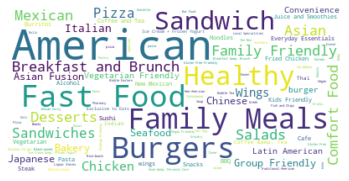

In [124]:
import wordcloud
import matplotlib.pyplot as plt
# Create and generate a word cloud image:
wordcloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [125]:
corr_matrix = df.corr()
corr_matrix

/var/folders/zn/2h_jn9152knbzpbwpq843zr80000gn/T/ipykernel_16561/2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,position,score,ratings,price_range,lat,lng,is_food
position,1.000000,0.101022,0.041163,0.075922,-0.002833,-0.042116,0.035348
score,0.101022,1.000000,0.176405,-0.050818,0.042613,-0.006513,-0.061248
ratings,0.041163,0.176405,1.000000,0.030494,-0.059380,0.081988,-0.036911
price_range,0.075922,-0.050818,0.030494,1.000000,0.007661,-0.020041,0.002711
lat,-0.002833,0.042613,-0.059380,0.007661,1.000000,-0.606303,0.032067
lng,-0.042116,-0.006513,0.081988,-0.020041,-0.606303,1.000000,-0.048110
is_food,0.035348,-0.061248,-0.036911,0.002711,0.032067,-0.048110,1.000000


array([[<AxesSubplot: xlabel='position', ylabel='position'>,
        <AxesSubplot: xlabel='score', ylabel='position'>,
        <AxesSubplot: xlabel='ratings', ylabel='position'>,
        <AxesSubplot: xlabel='price_range', ylabel='position'>],
       [<AxesSubplot: xlabel='position', ylabel='score'>,
        <AxesSubplot: xlabel='score', ylabel='score'>,
        <AxesSubplot: xlabel='ratings', ylabel='score'>,
        <AxesSubplot: xlabel='price_range', ylabel='score'>],
       [<AxesSubplot: xlabel='position', ylabel='ratings'>,
        <AxesSubplot: xlabel='score', ylabel='ratings'>,
        <AxesSubplot: xlabel='ratings', ylabel='ratings'>,
        <AxesSubplot: xlabel='price_range', ylabel='ratings'>],
       [<AxesSubplot: xlabel='position', ylabel='price_range'>,
        <AxesSubplot: xlabel='score', ylabel='price_range'>,
        <AxesSubplot: xlabel='ratings', ylabel='price_range'>,
        <AxesSubplot: xlabel='price_range', ylabel='price_range'>]],
      dtype=object)

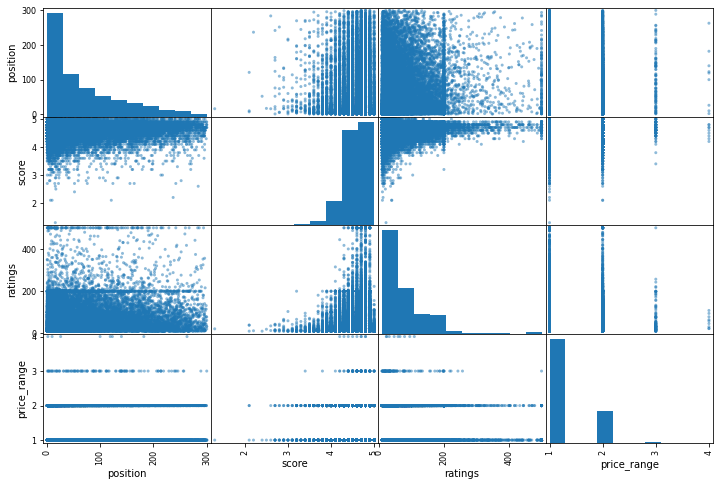

In [126]:
from pandas.plotting import scatter_matrix

attributes = ["position", "score", "ratings",
              "price_range"]
scatter_matrix(df[attributes], figsize=(12, 8))

# Chebyshev’s Theorem

In [127]:
#Task 7.1
import statistics as sts
print('Chebyshev’s Theorem tells the range where at least 8/9 of the data lie within 3 x std')
print('lower limit = mean - 3 x std, i.e.,', sts.mean(df['score'].values)-3 * sts.stdev(df['score'].values))
print('lower limit is adjusted to 0, as the score can not go below 0')
print('Upper limit = mean + 3 x std, i.e.,', sts.mean(df['score'].values)+3 * sts.stdev(df['score'].values))
print('Upper limit is adjusted to 100, as the score can not go beyond 100')
#print('Chebyshev’s Theorem is over conservative, does not help us understand the spread of data too much')

Chebyshev’s Theorem tells the range where at least 8/9 of the data lie within 3 x std
lower limit = mean - 3 x std, i.e., 3.6698066619586243
lower limit is adjusted to 0, as the score can not go below 0
Upper limit = mean + 3 x std, i.e., 5.447067488057067
Upper limit is adjusted to 100, as the score can not go beyond 100


# CDF PDF Graph

In [128]:
import math
import scipy.integrate as integrate
import numpy as np
def mydefined_CDF_StandardNormal(x):
    #integrate.quad 定积分
    #lambda 隐藏函数
    return integrate.quad(lambda x: (1/math.sqrt(2*math.pi))*math.exp(-x**2/2),-np.inf,x)

def mydefined_PDF_Normal(mu_par,sigma_par,x):
    return  1/(sigma_par*math.sqrt(2*math.pi))*math.exp(-(x-mu_par)**2/(2*sigma_par**2))

Text(0.5, 1.0, 'PDF of normal distribution')

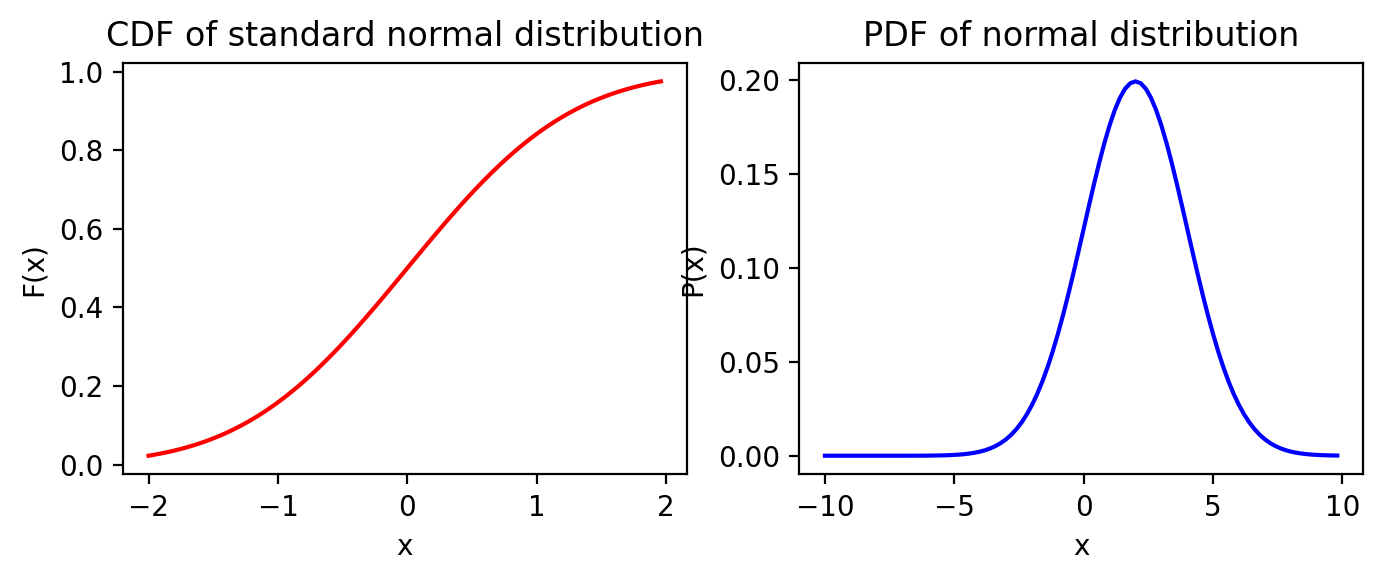

In [129]:
#Task 7.2
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=200)
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)

CDF_Point = np.zeros((100,1))
x_point = np.zeros((100,1))
for i in range(0,100):
    x_point[i]=-2+4/100*i
    CDF_Point[i]=mydefined_CDF_StandardNormal(x_point[i])[0]
ax1.plot(x_point,CDF_Point, linestyle = 'solid',color ='red')
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')   
ax1.set_title('CDF of standard normal distribution')

PDF_Point = np.zeros((100,1))
x_point_t2 = np.zeros((100,1))
for i in range(0,100):
    x_point_t2[i]=-10+20/100*i
    PDF_Point[i]=mydefined_PDF_Normal(2,2,x_point_t2[i])
ax2.plot(x_point_t2,PDF_Point, linestyle = 'solid',color ='blue')
ax2.set_xlabel('x')
ax2.set_ylabel('P(x)') 
ax2.set_title('PDF of normal distribution')

# ***1.T-test***
## a) Use critical region approach to test whether restaurant's name contains food by using two-sided hypothesis $H_0: \mu_X=\mu_Y$ with type I error $\alpha = 0.05$.


Degree of freedom is 15183.612307250272
The lower critical value is -1.9601202357064098
The upper critical value is 1.9601202357064094
The test statistic is 8.259178615312482
The test statistic is in the critical region, null hypothesis is rejected 


/var/folders/zn/2h_jn9152knbzpbwpq843zr80000gn/T/ipykernel_16561/2982475418.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, sts.t.pdf(x, welch_test_df), 'r-', color='#77BFA3',alpha=0.6)  #Generate PDF of t-distribution with 12 degree of freedom. 12 is from welch_test_df


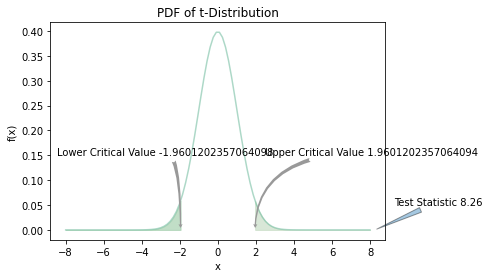

In [130]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import math

Sample_X=df[df.is_food == 1].score.values  #Construct two sample from the table above
Sample_Y=df[df.is_food == 0].score.values
len_X=len(Sample_X)
len_Y=len(Sample_Y)

welch_test_df=(np.var(Sample_X,ddof=1)/len_X+np.var(Sample_Y,ddof=1)/len_Y)**2/((np.var(Sample_X,ddof=1)/len_X)**2/(len_X-1)+(np.var(Sample_Y,ddof=1)/len_Y)**2/(len_Y-1)) #degree of freedom formula defined in welch test
print('Degree of freedom is', welch_test_df)
x = np.linspace(-8, 8, 100)#Return evenly spaced numbers over a specified interval between -8 and 8.
plt.plot(x, sts.t.pdf(x, welch_test_df), 'r-', color='#77BFA3',alpha=0.6)  #Generate PDF of t-distribution with 12 degree of freedom. 12 is from welch_test_df
plt.title('PDF of t-Distribution')
plt.ylabel('f(x)')
plt.xlabel('x')

C_value_L=sts.t.ppf(0.025, welch_test_df, loc=0, scale=1) #Compute lower critical value by using the inverse function of cdf of t-distribution with 12 degree of function
print('The lower critical value is', C_value_L)
x2= np.linspace(-8,C_value_L, 100) #Return evenly spaced numbers over a specified interval between -8 and lower critical value.
plt.fill_between(x2, sts.t.pdf(x2, welch_test_df), color='#98C9A3',alpha=0.6) #Generate a shaped area under the curve sts.t.pdf(x2, 12)

C_value_U=sts.t.ppf(0.975, welch_test_df, loc=0, scale=1) #compute upper critical value by using the inverse function of cdf of t-distribution with 12 degree of function
print('The upper critical value is', C_value_U)
x3= np.linspace(C_value_U,8, 100)#Return evenly spaced numbers over a specified interval between upper critical value and 8.
plt.fill_between(x3, sts.t.pdf(x3, welch_test_df), color='#BFD8BD',alpha=0.6) #Generate a shaped area under the curve sts.t.pdf(x3, 12)


plt.annotate(f'Lower Critical Value {C_value_L}',(C_value_L,0),(C_value_L-6.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90")) #Annotation 

plt.annotate(f'Upper Critical Value {C_value_U}',(C_value_U,0),(C_value_U+0.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90")) #Annotation 

test_statistic_value=np.abs(np.mean(Sample_X)-np.mean(Sample_Y))/np.sqrt(np.var(Sample_X,ddof=1)/len_X+np.var(Sample_Y,ddof=1)/len_Y) #compute test statistc
print('The test statistic is', test_statistic_value)
plt.annotate(f'Test Statistic {round(test_statistic_value,2)}',(test_statistic_value,0),(test_statistic_value+1,0.05),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))  #Annotation 
print('The test statistic is in the critical region, null hypothesis is rejected ')

Degree of freedom is 7222.432360967364
The lower critical value is -1.9602924974228129
The upper critical value is 1.9602924974228124
The test statistic is 7.506688653441503
The test statistic is in the critical region, null hypothesis is rejected 


/var/folders/zn/2h_jn9152knbzpbwpq843zr80000gn/T/ipykernel_16561/1071357075.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, sts.t.pdf(x, welch_test_df), 'r-', color='#77BFA3',alpha=0.6)  #Generate PDF of t-distribution with 12 degree of freedom. 12 is from welch_test_df


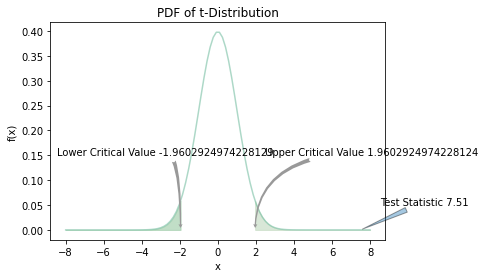

In [131]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import math

Sample_X=df[df.price_range == 1].score.values  #Construct two sample from the table above
Sample_Y=df[df.price_range > 1].score.values
len_X=len(Sample_X)
len_Y=len(Sample_Y)

welch_test_df=(np.var(Sample_X,ddof=1)/len_X+np.var(Sample_Y,ddof=1)/len_Y)**2/((np.var(Sample_X,ddof=1)/len_X)**2/(len_X-1)+(np.var(Sample_Y,ddof=1)/len_Y)**2/(len_Y-1)) #degree of freedom formula defined in welch test
print('Degree of freedom is', welch_test_df)
x = np.linspace(-8, 8, 100)#Return evenly spaced numbers over a specified interval between -8 and 8.
plt.plot(x, sts.t.pdf(x, welch_test_df), 'r-', color='#77BFA3',alpha=0.6)  #Generate PDF of t-distribution with 12 degree of freedom. 12 is from welch_test_df
plt.title('PDF of t-Distribution')
plt.ylabel('f(x)')
plt.xlabel('x')

C_value_L=sts.t.ppf(0.025, welch_test_df, loc=0, scale=1) #Compute lower critical value by using the inverse function of cdf of t-distribution with 12 degree of function
print('The lower critical value is', C_value_L)
x2= np.linspace(-8,C_value_L, 100) #Return evenly spaced numbers over a specified interval between -8 and lower critical value.
plt.fill_between(x2, sts.t.pdf(x2, welch_test_df), color='#98C9A3',alpha=0.6) #Generate a shaped area under the curve sts.t.pdf(x2, 12)

C_value_U=sts.t.ppf(0.975, welch_test_df, loc=0, scale=1) #compute upper critical value by using the inverse function of cdf of t-distribution with 12 degree of function
print('The upper critical value is', C_value_U)
x3= np.linspace(C_value_U,8, 100)#Return evenly spaced numbers over a specified interval between upper critical value and 8.
plt.fill_between(x3, sts.t.pdf(x3, welch_test_df), color='#BFD8BD',alpha=0.6) #Generate a shaped area under the curve sts.t.pdf(x3, 12)


plt.annotate(f'Lower Critical Value {C_value_L}',(C_value_L,0),(C_value_L-6.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90")) #Annotation 

plt.annotate(f'Upper Critical Value {C_value_U}',(C_value_U,0),(C_value_U+0.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90")) #Annotation 

test_statistic_value=np.abs(np.mean(Sample_X)-np.mean(Sample_Y))/np.sqrt(np.var(Sample_X,ddof=1)/len_X+np.var(Sample_Y,ddof=1)/len_Y) #compute test statistc
print('The test statistic is', test_statistic_value)
plt.annotate(f'Test Statistic {round(test_statistic_value,2)}',(test_statistic_value,0),(test_statistic_value+1,0.05),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))  #Annotation 
print('The test statistic is in the critical region, null hypothesis is rejected ')

In [132]:
from IPython.display import display, Markdown, Latex
result_tTest=sts.ttest_ind(Sample_X,Sample_Y,alternative='two-sided',equal_var=False)
display(result_tTest)
print('The test statistic is a random variable, but for this sample, the value is', round(result_tTest[0],2))
display(Markdown('Null hypothesis is two-sided, $H_0: \mu_X=\mu_Y$'))
display(Markdown(f'Null hypothesis should be rejected, as p-value {round(result_tTest[1],2)} is smaller than type I error 0.05'))
display(Markdown('Alternative hypothesis is true, $H_a: \mu_X ≠ \mu_Y$'))

Ttest_indResult(statistic=7.506688653441503, pvalue=6.791002539195744e-14)

The test statistic is a random variable, but for this sample, the value is 7.51


Null hypothesis is two-sided, $H_0: \mu_X=\mu_Y$

Null hypothesis should be rejected, as p-value 0.0 is smaller than type I error 0.05

Alternative hypothesis is true, $H_a: \mu_X ≠ \mu_Y$

# ***2.Wilcoxon–Mann–Whitney  U-Test***


Text(0, 0.5, 'Counts')

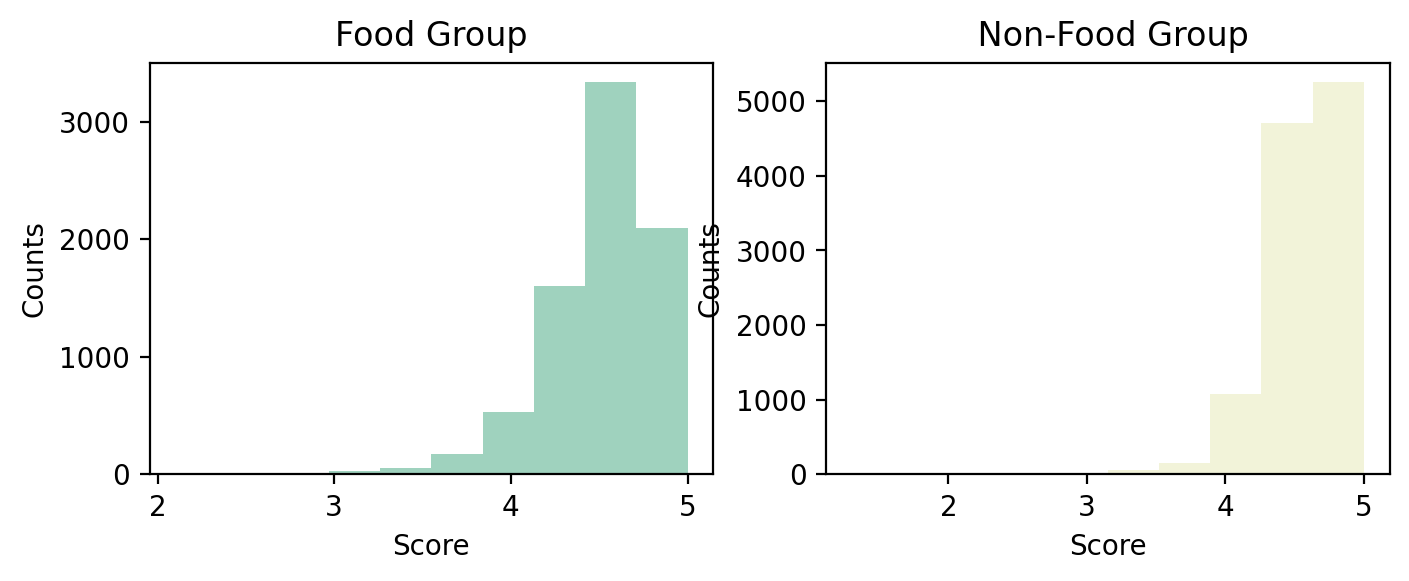

In [133]:
Sample_C=df[df.is_food == 1].score.values   #Construct two sample from the table above
Sample_W=df[df.is_food == 0].score.values
len_C=len(df[df.is_food == 1].score)
len_w=len(df[df.is_food == 1].score)


fig = plt.figure(figsize=(8, 6), dpi=200)  #Generate blank figure layout is 2 x 2, size 8 inch  x 6 inch, 200 dpi
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)

ax1.hist(Sample_C, color ='#77BFA3',alpha = 0.7) #Generate relative frequency histogram for coffee group
ax1.set_title('Food Group')
ax1.set_xlabel('Score')
ax1.set_ylabel('Counts')

ax2.hist(Sample_W, color ='#EDEEC9',alpha = 0.7) #Generate relative frequency histogram for water group
ax2.set_title(' Non-Food Group')
ax2.set_xlabel('Score')
ax2.set_ylabel('Counts')

In [134]:
print(sts.mannwhitneyu(Sample_C,Sample_W,alternative='two-sided')) #Use mannwhitneyu () to conduct WMW U test. par 1,2 are samples, par 3 is to specify the formulation of hypothesis
if sts.mannwhitneyu(Sample_C,Sample_W,alternative='two-sided')[1]>0.05:
    print('null hypothesis is retained')
else:
    print('null hypothesis is reject')

MannwhitneyuResult(statistic=41866156.5, pvalue=3.0956042979081e-10)
null hypothesis is reject


The test statistic is -428.103061118735
The lower critical value is -1.9599639845400545
The upper critical value is 1.959963984540054
The test statistic is not in the critical region, null hypothesis is retained 


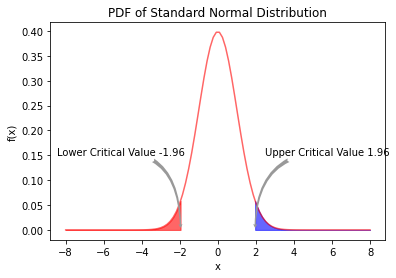

In [135]:
#Compute the sum of ranks for each sample
Sample_C=df[df.is_food == 1].score.values   #Construct two sample from the table above
Sample_W=df[df.is_food == 0].score.values
len_C=len(df[df.is_food == 1].score)
len_w=len(df[df.is_food == 1].score)

Mix_Sample=np.concatenate((Sample_C, Sample_W)) #merge two samples into a sample by np.concatenate()
Rank_loc_info=Mix_Sample.argsort() #sort the sample value from small to large
Rank_Plus_1=0
Rank_Plus_2=0
for i in range(0,len(Mix_Sample)):
    if Mix_Sample[Rank_loc_info[i]] in Sample_C:
        Rank_Plus_1=Rank_Plus_1+(i+1) #sum up the rank for sample C
    else:
        Rank_Plus_2=Rank_Plus_2+(i+1) #sum up the rank for sample W
#Compute parameters U_1 and U_2
U_1=len_C*len_w+(len_C*(len_C+1)/2)-Rank_Plus_1
U_2=len_C*len_w+(len_w*(len_w+1)/2)-Rank_Plus_2

#Compute test statistic
U=np.minimum(U_1,U_2)
test_stat= (U - len_w*len_C/2)/(np.sqrt(len_C*len_w*(len_C+len_w+1)/12))
print('The test statistic is', test_stat)


#Visualise critical region  
x = np.linspace(-8, 8, 100)#Return evenly spaced numbers over a specified interval between -8 and 8.
plt.plot(x, sts.norm.pdf(x,loc=0, scale=1), 'r-', alpha=0.6)  #Generate PDF of standard normal distribution
plt.title('PDF of Standard Normal Distribution')
plt.ylabel('f(x)')
plt.xlabel('x')

C_value_L=sts.norm.ppf(0.025, loc=0, scale=1) #Compute lower critical value by using the inverse function of cdf of standard normal distribution
print('The lower critical value is', C_value_L)
x2= np.linspace(-8,C_value_L, 100) #Return evenly spaced numbers over a specified interval between -8 and lower critical value.
plt.fill_between(x2, sts.norm.pdf(x2,loc=0, scale=1), color='red',alpha=0.6)

C_value_U=sts.norm.ppf(0.975, loc=0, scale=1)#Compute upper critical value by using the inverse function of cdf of standard normal distribution
print('The upper critical value is', C_value_U)
x3= np.linspace(C_value_U,8, 100) #Return evenly spaced numbers over a specified interval between upper critical value and 8.
plt.fill_between(x3, sts.norm.pdf(x3,loc=0, scale=1), color='blue',alpha=0.6)


plt.annotate(f'Lower Critical Value {round(C_value_L,2)}',(C_value_L,0),(C_value_L-6.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.annotate(f'Upper Critical Value {round(C_value_U,2)}',(C_value_U,0),(C_value_U+0.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.annotate(f'Test Statistic {round(test_stat,2)}',(test_stat,0),(test_stat+1,0.05),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))
print('The test statistic is not in the critical region, null hypothesis is retained ')

# 3: $\chi^2$-Goodness-of-Fit Test

In [136]:
print(len(df[(df.is_food == 1) & (df.price_range == 1)]))
print(len(df[(df.is_food == 0) & (df.price_range > 1)]))
print(len(df[(df.is_food == 1) & (df.price_range > 1)]))
print(len(df[(df.is_food == 0) & (df.price_range == 1)]))


5954
2685
1885
8594


In [137]:
from IPython.display import display, Markdown, Latex
len_FoodLow=len(df[(df.is_food == 1) & (df.price_range == 1)])
len_NonFoodLow=len(df[(df.is_food == 0) & (df.price_range == 1)])
len_FoodHigh=len(df[(df.is_food == 1) & (df.price_range > 1)])
len_NonFoodHigh=len(df[(df.is_food == 0) & (df.price_range > 1)])
Num_OB=np.array([len_FoodLow,len_NonFoodLow,len_FoodHigh,len_NonFoodHigh]) #array for observed absolute freq
Total_OB=np.sum(Num_OB)
P_O=np.array([len_FoodLow/Total_OB,len_NonFoodLow/Total_OB,len_FoodHigh/Total_OB,len_NonFoodHigh/Total_OB])*Total_OB #array for expected absolute freq 


display(sts.chisquare(Num_OB,P_O)) #Use mannwhitneyu () to conduct chi2goodness of fit test. par 1,2 are observed/expected absolute freq
print('The test statistic is a random variable, but for this sample, the value is', sts.chisquare(Num_OB,P_O)[0])
display(Markdown('Null hypothesis is two-sided, $H_0: H_0: P(X = i) = p_i$'))
display(Markdown('Null hypothesis should be retained'))

Power_divergenceResult(statistic=1.389285543421276e-28, pvalue=1.0)

The test statistic is a random variable, but for this sample, the value is 1.389285543421276e-28


Null hypothesis is two-sided, $H_0: H_0: P(X = i) = p_i$

Null hypothesis should be retained

The lower critical value is 0.21579528262389785
The upper critical value is 9.348403604496148
The test statistic is 1.389285543421276e-28
The test statistic is NOT in the critical region, null hypothesis should be retained 


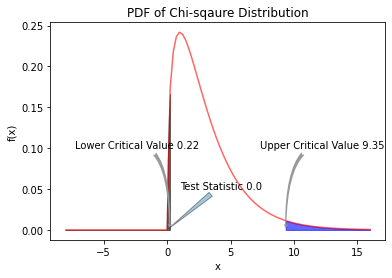

In [138]:
#Visualise critical region  
x = np.linspace(-8, 16, 100)
plt.plot(x, sts.chi2.pdf(x, len(Num_OB)-1,loc=0, scale=1), 'r-', alpha=0.6)
plt.title('PDF of Chi-sqaure Distribution')
plt.ylabel('f(x)')
plt.xlabel('x')


C_value_L=sts.chi2.ppf(0.025, len(Num_OB)-1, loc=0, scale=1)
print('The lower critical value is', C_value_L)
x2= np.linspace(-8,C_value_L, 100)
plt.fill_between(x2, sts.chi2.pdf(x2, len(Num_OB)-1,loc=0, scale=1), color='black',alpha=0.6)

C_value_U=sts.chi2.ppf(0.975, len(Num_OB)-1,loc=0, scale=1)
print('The upper critical value is', C_value_U)
x3= np.linspace(C_value_U,16, 100)
plt.fill_between(x3, sts.chi2.pdf(x3,len(Num_OB)-1, loc=0, scale=1), color='blue',alpha=0.6)

plt.annotate(f'Lower Critical Value {round(C_value_L,2)}',(C_value_L,0),(C_value_L-7.5,0.1),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.annotate(f'Upper Critical Value {round(C_value_U,2)}',(C_value_U,0),(C_value_U-2,0.1),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

test_statistic_value=0
for i in range(4):
    test_statistic_value=test_statistic_value+(Num_OB[i]-P_O[i])**2/P_O[i]
print('The test statistic is', test_statistic_value)
plt.annotate(f'Test Statistic {round(test_statistic_value,2)}',(test_statistic_value,0),(test_statistic_value+1,0.05),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))
print('The test statistic is NOT in the critical region, null hypothesis should be retained ')

# visualization

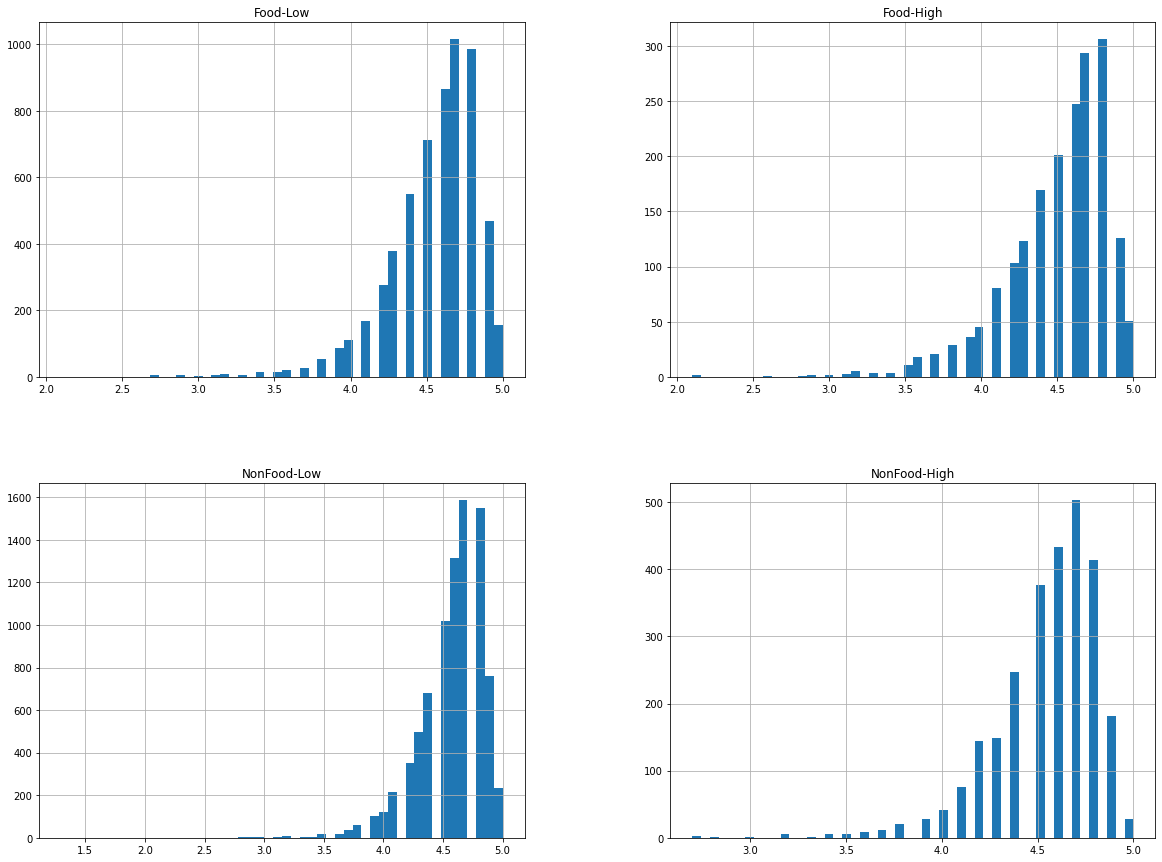

In [139]:
import matplotlib.pyplot as plt
df1 = pd.DataFrame(
    {'Food-Low': df[(df.is_food == 1) & (df.price_range == 1)].score.values})
df2 = pd.DataFrame(
    {'Food-High': df[(df.is_food == 1) & (df.price_range > 1)].score.values})
df3 = pd.DataFrame(
    {'NonFood-Low': df[(df.is_food == 0) & (df.price_range == 1)].score.values})
df4 = pd.DataFrame(
    {'NonFood-High': df[(df.is_food == 0) & (df.price_range > 1)].score.values})
# merge all dataframe objects
dataframe_ob_two = pd.concat([df1, df2, df3, df4], axis=1)
dataframe_ob_two.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: >

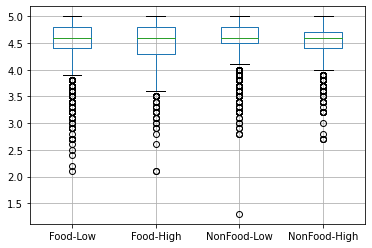

In [140]:
import matplotlib.pyplot as plt
#plt.boxplot(df['Hours'].values)
dataframe_ob_two.boxplot()

In [141]:
dataframe_ob_two.describe()

,Food-Low,Food-High,NonFood-Low,NonFood-High
count,5954.000000,1885.000000,8594.000000,2685.000000
mean,4.547699,4.501857,4.581697,4.547523
std,0.310165,0.352067,0.275018,0.279381
min,2.100000,2.100000,1.300000,2.700000
25%,4.400000,4.300000,4.500000,4.400000
50%,4.600000,4.600000,4.600000,4.600000
75%,4.800000,4.800000,4.800000,4.700000
max,5.000000,5.000000,5.000000,5.000000


# 4.1: One-way ANOVA

number of price's data are too small 

# 4.2: Two group Two-way ANOVA

/var/folders/zn/2h_jn9152knbzpbwpq843zr80000gn/T/ipykernel_16561/394563630.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)
/var/folders/zn/2h_jn9152knbzpbwpq843zr80000gn/T/ipykernel_16561/394563630.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)


Text(0, 0.5, 'Marginal Mean of Price')

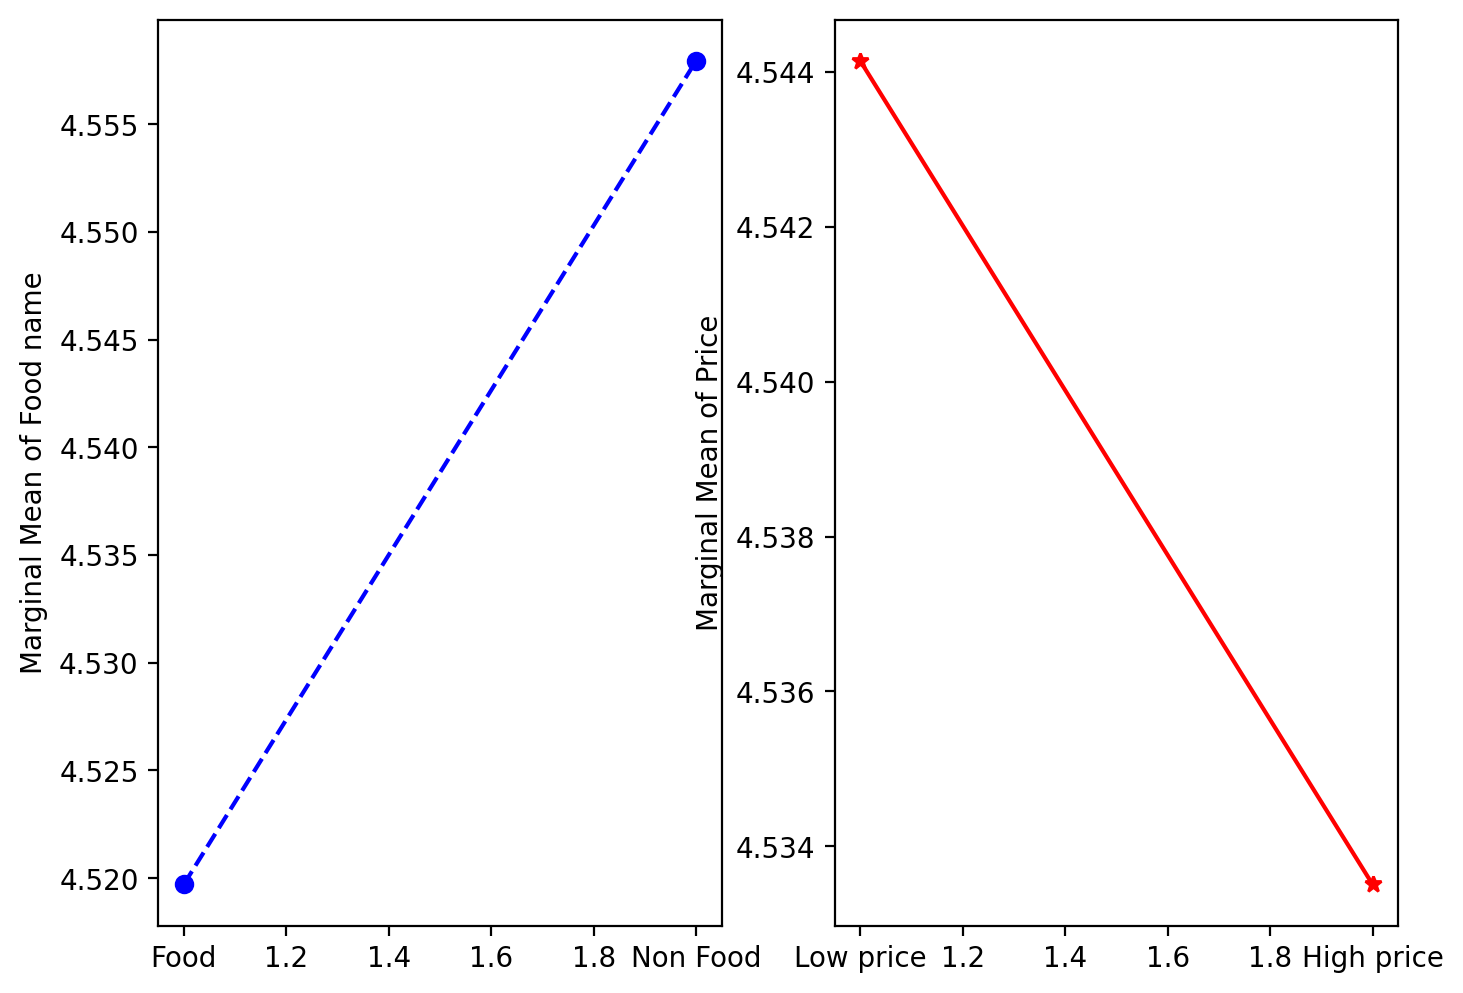

In [142]:
# construct one dataframe object for each combination of factor A group and factor B group
# in total, 9 combinations for this experiment
import pandas as pd

# construct a dataframe object for each combination
df1 = pd.DataFrame(
    {'Food-Low': df[(df.is_food == 1) & (df.price_range == 1)].score.values})
df2 = pd.DataFrame(
    {'Food-High': df[(df.is_food == 1) & (df.price_range > 1)].score.values})
df3 = pd.DataFrame(
    {'NonFood-Low': df[(df.is_food == 0) & (df.price_range == 1)].score.values})
df4 = pd.DataFrame(
    {'NonFood-High': df[(df.is_food == 0) & (df.price_range > 1)].score.values})
# merge all dataframe objects
dataframe_ob_two = pd.concat([df1, df2, df3, df4], axis=1)
dataframe_ob_two = dataframe_ob_two.loc[:1800]
# compute the marginal mean for each material type, for M1, compute average of combinations M1-Low, M1-med, and M1-high
# for M2, compute average of combinations M2-Low, M2-med, and M2-high
# for M3, compute average of combinations M3-Low, M3-med, and M3-high
Marginal_Mean_Food = np.mean(np.concatenate(
    (dataframe_ob_two['Food-Low'].values, dataframe_ob_two['Food-High'].values), axis=None))
Marginal_Mean_NonFood = np.mean(np.concatenate(
    (dataframe_ob_two['NonFood-Low'].values, dataframe_ob_two['NonFood-High'].values), axis=None))

# generate 8 in x 6 in plot, dpi=200
fig = plt.figure(figsize=(8, 6), dpi=200)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# plot for marginal means of 3 material types
ax1.plot([1, 2], [Marginal_Mean_Food, Marginal_Mean_NonFood],
         linestyle='--', marker='o', color='b')


labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[1] = 'Food'
labels[6] = 'Non Food'

ax1.set_xticklabels(labels)
ax1.set_ylabel('Marginal Mean of Food name')

# compute the marginal mean for temperature, for low, compute average of combinations M1-Low, M2-low, and M3-low
# for med, compute average of combinations M1-med, M2-med, and M3-med
# for high, compute average of combinations M1-high, M2-high, and M3-high
Marginal_Mean_Low = np.mean(np.concatenate(
    (dataframe_ob_two['Food-Low'].values, dataframe_ob_two['NonFood-Low'].values), axis=None))
Marginal_Mean_High = np.mean(np.concatenate(
    (dataframe_ob_two['Food-High'].values, dataframe_ob_two['NonFood-High'].values), axis=None))
# plot for marginal means of 3 levels of temperature
ax2.plot([1, 2], [Marginal_Mean_Low, Marginal_Mean_High],
         linestyle='-', marker='*', color='r')

labels = [item.get_text() for item in ax2.get_xticklabels()]
labels[1] = 'Low price'
labels[6] = 'High price'

ax2.set_xticklabels(labels)
ax2.set_ylabel('Marginal Mean of Price')


In [143]:
#Compute degrees of freedom for SSA, SSB, SSAB and SSE
r=2
c=2
n=len(dataframe_ob_two)
#SSA=r-1
dof_SSA=r-1
#SSB=c-1
dof_SSB=c-1
#SSAB=(𝑟−1)(𝑐−1)
dof_SSAB=(r-1)*(c-1)
#SSE=𝑟𝑐(𝑛' −1)
dof_SSE=r*c*(n-1)

print('For factor name variation, degrees of freedom is', dof_SSA )
print('For factor price variation, degrees of freedom is', dof_SSB )
print('For interaction variation, degrees of freedom is', dof_SSAB )
print('For random variation, degrees of freedom is', dof_SSE )

For factor name variation, degrees of freedom is 1
For factor price variation, degrees of freedom is 1
For interaction variation, degrees of freedom is 1
For random variation, degrees of freedom is 7200


critical value is 3.8427506889103933
critical value is 3.8427506889103933
critical value is 3.8427506889103933


Text(3.5427506889103935, 0.15, 'Critical Value is 3.84')

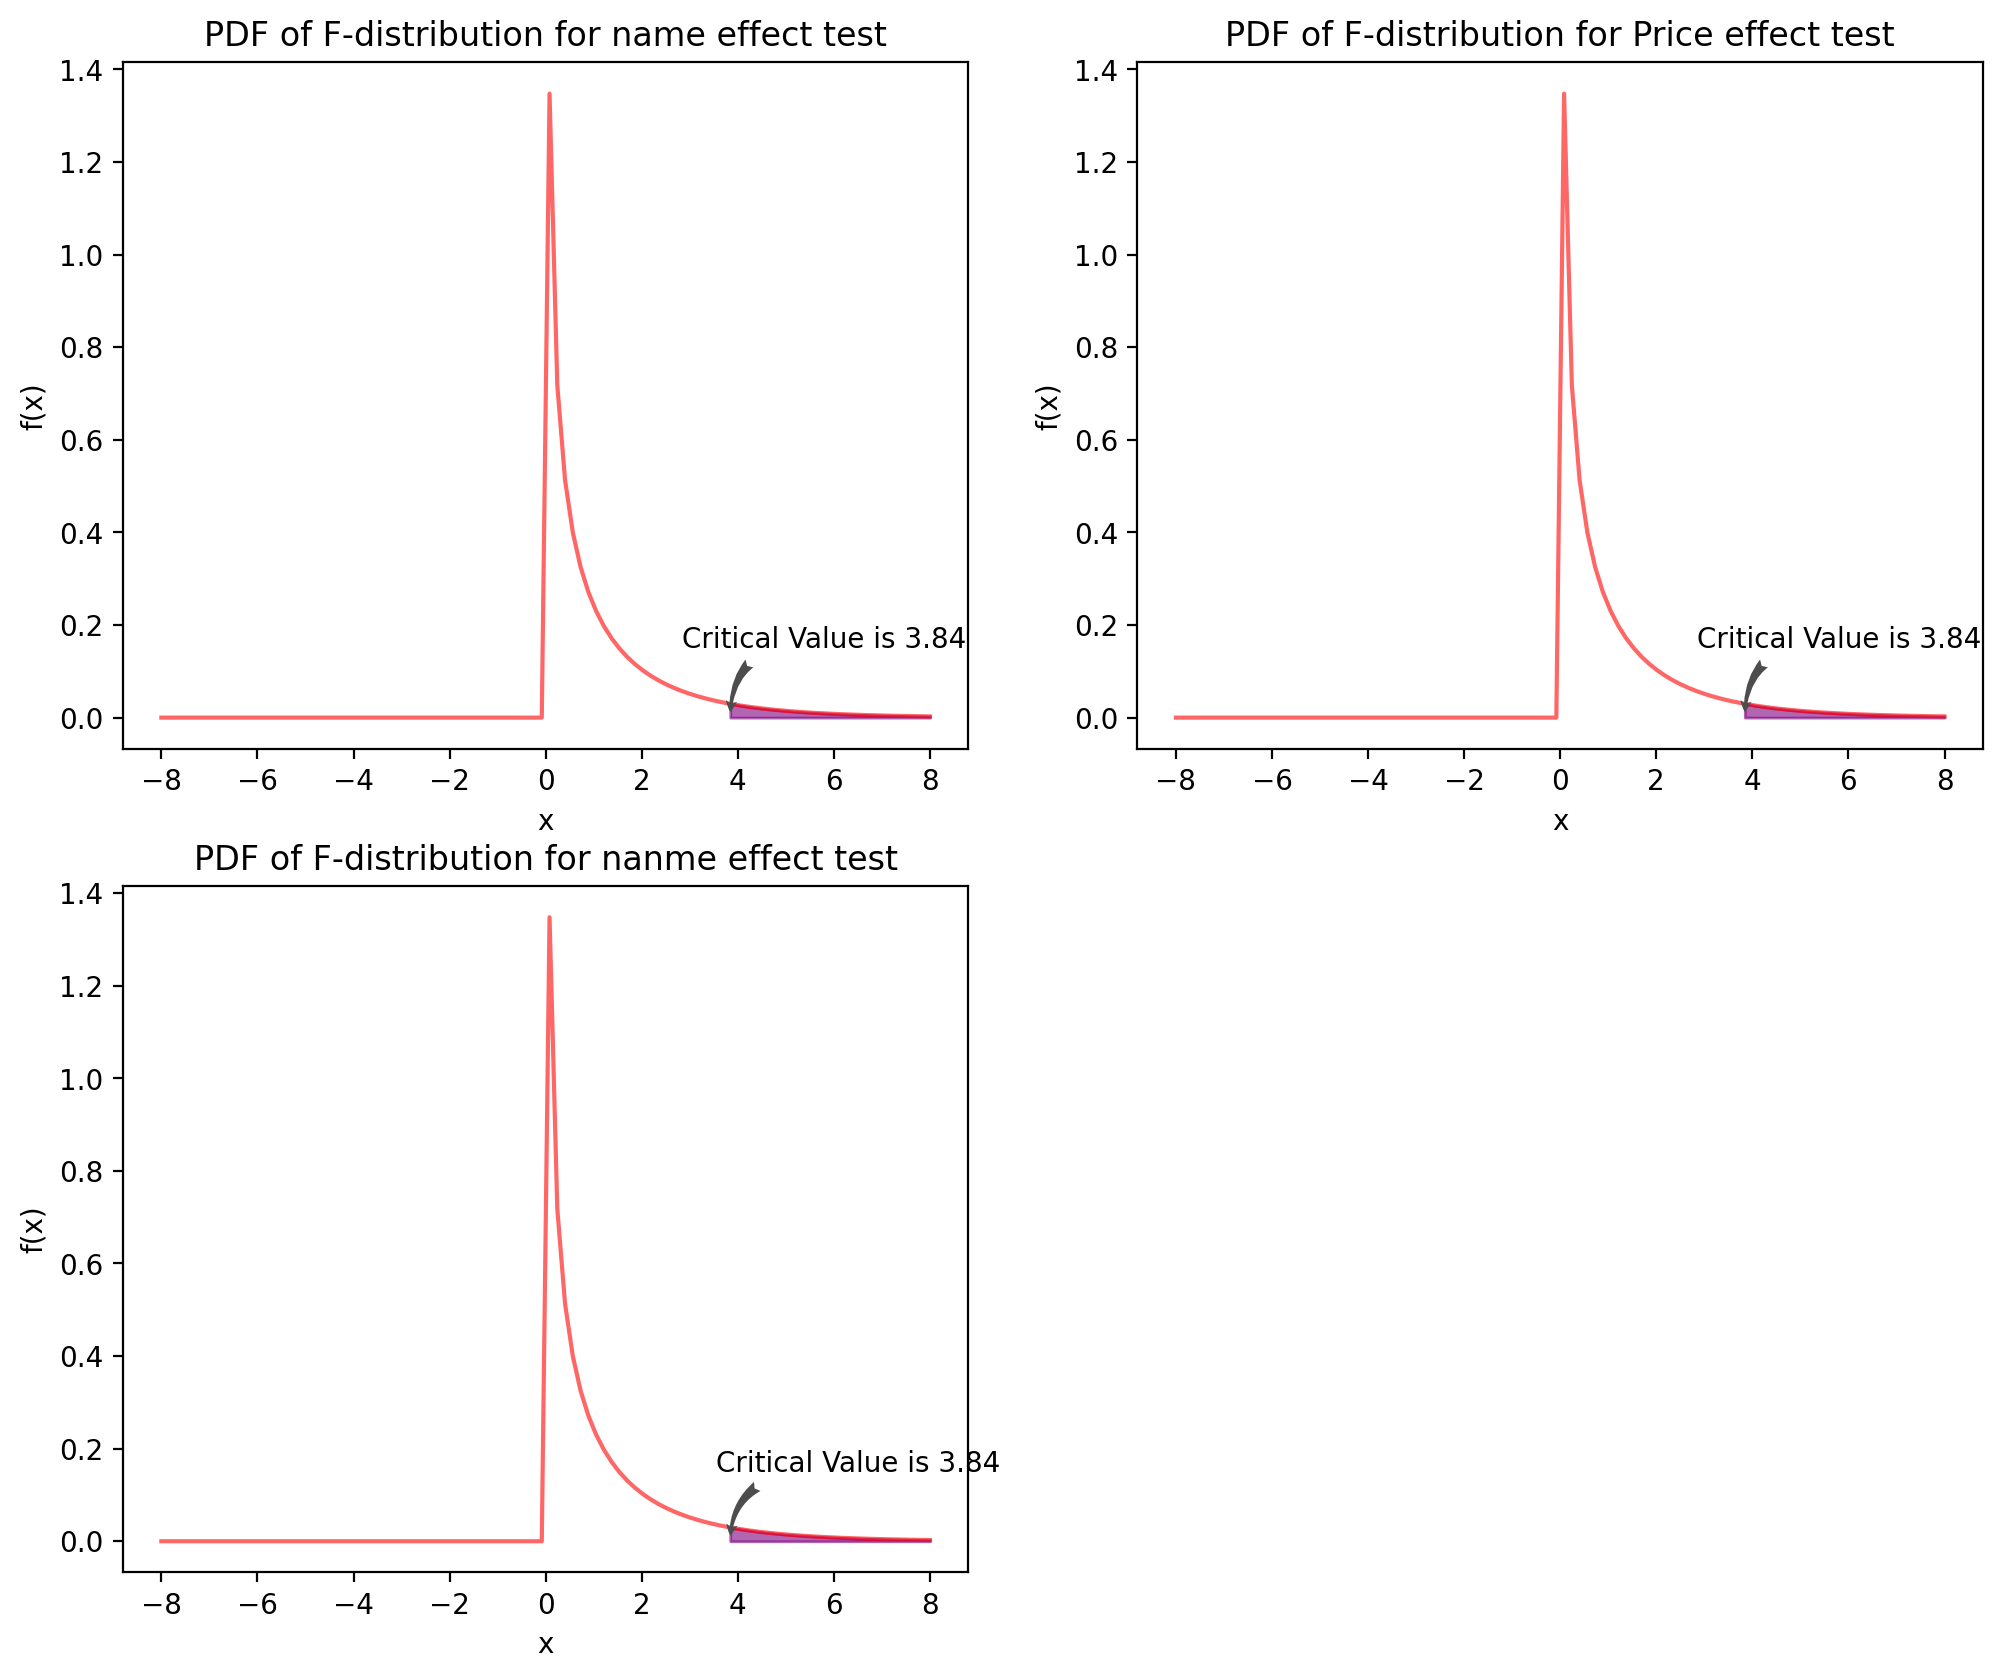

In [144]:
# Given a Type I error 5%, use the inverse function of CDF of F-distribution to compute critical value(s) of one-sided critical regions for factor and interaction effects

import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np


#generate a figure with size 12 in x 8 in and dpi=200
fig_two = plt.figure(figsize=(12, 10), dpi=200)
#the figure has 2 x 2 layout

ax1_two=fig_two.add_subplot(2,2,1)
ax2_two=fig_two.add_subplot(2,2,2)
ax3_two=fig_two.add_subplot(2,2,3)

#ax1 is the first subplot, showing the critical region of material effect test
x11 = np.linspace(-8, 8, 100)
ax1_two.plot(x11, sts.f.pdf(x11,dof_SSA, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax1_two.set_title('PDF of F-distribution for name effect test')
ax1_two.set_ylabel('f(x)')
ax1_two.set_xlabel('x')

C_value_material=sts.f.ppf(0.95, dof_SSA, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_material)
x12= np.linspace(C_value_material,8, 100)
ax1_two.fill_between(x12, sts.f.pdf(x12,dof_SSA, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax1_two.annotate(f'Critical Value is {round(C_value_material,2)}',(C_value_material,0),(C_value_material-1,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))


#ax2 is the second subplot, showing the critical region of temperature effect test
x21 = np.linspace(-8, 8, 100)
ax2_two.plot(x21, sts.f.pdf(x21,dof_SSB, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax2_two.set_title('PDF of F-distribution for Price effect test')
ax2_two.set_ylabel('f(x)')
ax2_two.set_xlabel('x')

C_value_temperature=sts.f.ppf(0.95, dof_SSB, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_temperature)
x22= np.linspace(C_value_temperature,8, 100)
ax2_two.fill_between(x22, sts.f.pdf(x22,dof_SSB, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax2_two.annotate(f'Critical Value is {round(C_value_temperature,2)}',(C_value_temperature,0),(C_value_temperature-1,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

#ax3 is the third subplot, showing the critical region of interaction effect test
x31 = np.linspace(-8, 8, 100)
ax3_two.plot(x31, sts.f.pdf(x31,dof_SSAB, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax3_two.set_title('PDF of F-distribution for nanme effect test')
ax3_two.set_ylabel('f(x)')
ax3_two.set_xlabel('x')


C_value_interation=sts.f.ppf(0.95, dof_SSAB, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_interation)
x32= np.linspace(C_value_interation,8, 100)
ax3_two.fill_between(x32, sts.f.pdf(x32,dof_SSAB, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax3_two.annotate(f'Critical Value is {round(C_value_interation,2)}',(C_value_interation,0),(C_value_interation-0.3,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

In [145]:
# Calculate the test statistic for factor and interaction effects and make the decision.
Marginal_Mean_Name = [Marginal_Mean_Food,Marginal_Mean_NonFood]
Marginal_Mean_Price = [Marginal_Mean_Low,Marginal_Mean_High]

# because the sample sizes in all combination are 4, grand mean can be computed by using either marginal means for material or marginal means for temperature  
grand_mean_two=np.mean(Marginal_Mean_Name)
# compute SSA 
SSA_material=0
for i in range(2):
    SSA_material=SSA_material+(Marginal_Mean_Name[i]-grand_mean_two)**2
SSA_material=SSA_material*c*n

# compute SSB 
SSB_temperature=0
for j in range(2):
    SSB_temperature=SSB_temperature+(Marginal_Mean_Price[j]-grand_mean_two)**2
SSB_temperature=SSB_temperature*r*n

# compute SSAB 
SSAB=0
for i in [0,2]:
    SSAB=SSAB+(np.mean(dataframe_ob_two.values[:,i])-Marginal_Mean_Name[int(i/2)]-Marginal_Mean_Price[0]+grand_mean_two)**2
    SSAB=SSAB+(np.mean(dataframe_ob_two.values[:,i+1])-Marginal_Mean_Name[int(i/2)]-Marginal_Mean_Price[1]+grand_mean_two)**2
SSAB=SSAB*n

# compute SSE
SSE=0
for i in range(2):
    for k in range(2):
        SSE=SSE+(dataframe_ob_two.values[k,i]-np.mean(dataframe_ob_two.values[:,i]))**2
        SSE=SSE+(dataframe_ob_two.values[k,i+1]-np.mean(dataframe_ob_two.values[:,i+1]))**2
            

# compute test statistic for material effect
test_statistic_material=(SSA_material/dof_SSA)/(SSE/dof_SSE)
print('The test statistic for Name effect is', test_statistic_material)
print('reject null hypothesis')
# compute test statistic for temperature effect 
test_statistic_temperature=(SSB_temperature/dof_SSB)/(SSE/dof_SSE)
print('The test statistic for Price effect  is', test_statistic_temperature)
print('reject null hypothesis')

# compute test statistic for interation effect 
test_statistic_interation=(SSAB/dof_SSAB)/(SSE/dof_SSE)
print('The test statistic for interation effect  is', test_statistic_interation)
print('reject null hypothesis')

print('there is strong evidence that the mean score varies with name and price factors')
print('score depends on both price and name')

The test statistic for Name effect is 9724.126841457251
reject null hypothesis
The test statistic for Price effect  is 752.2813280355696
reject null hypothesis
The test statistic for interation effect  is 3001.273716499556
reject null hypothesis
there is strong evidence that the mean score varies with name and price factors
score depends on both price and name


### Tukey krumer test

In [146]:
# two factor effect are significant,so we perform Tukey-Kramer procedure.
# Step 1: Compute pairwise absolute difference between marginal sample means of factors material and temperature
Pair_Diff_naem=np.zeros((2,2))
Pair_Diff_price=np.zeros((2,2))
#compute the pairwise absolute difference for distinctive pairs
for i in range(2):
    for j in range(2):
        if  i > j :
            Pair_Diff_naem[i,j]=abs(Marginal_Mean_Name[i]-Marginal_Mean_Name[j])
            Pair_Diff_price[i,j]=abs(Marginal_Mean_Price[i]-Marginal_Mean_Price[j])

            
# Step 2: Given Type I error 5% , compute the critical region for factor material and temperature by the inverse function of CDF of studentized range distribution
# for the use of studentized range distribution, refer to https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.studentized_range.html
# 1st para: 1-alpha
# 2nd/3rd paras: two groups of degrees of freedom
# loc and scale=1 default settings
critical_value_name_TK= sts.studentized_range.ppf(0.95,dof_SSA,dof_SSE,loc=0, scale=1)*np.sqrt((SSE/dof_SSE)/(c*n))
critical_value_price_TK= sts.studentized_range.ppf(0.95,dof_SSB,dof_SSE,loc=0, scale=1)*np.sqrt((SSE/dof_SSE)/(r*n))
# Step 3: Compare each pairwise absolute difference with the corresponding critical values.

for i in range(2):
    for j in range(2):
        if  i > j :
            if Pair_Diff_naem[i,j]>critical_value_name_TK:
                print('there is a significant difference in population mean between groups',i,'and',j, 'of factor name.')
            else:
                print('there is no difference in population mean between groups',i,'and',j, 'of factor name.')
            if Pair_Diff_price[i,j]>critical_value_price_TK:
                print('there is a significant difference in population mean between groups',i,'and',j, 'of factor price.')
            else:
                print('there is no difference in population mean between groups',i,'and',j, 'of factor price.')
        

there is no difference in population mean between groups 1 and 0 of factor name.
there is no difference in population mean between groups 1 and 0 of factor price.


# 4.3: Three group Two-way ANOVA

In [147]:
# construct one dataframe object for each combination of factor A group and factor B group
# in total, 9 combinations for this experiment
import pandas as pd

# construct a dataframe object for each combination
df1 = pd.DataFrame(
    {'Food-Low': df[(df.is_food == 1) & (df.price_range == 1)].score.values})
df2 = pd.DataFrame(
    {'Food-Med': df[(df.is_food == 1) & (df.price_range == 2)].score.values})
df3 = pd.DataFrame(
    {'Food-High': df[(df.is_food == 1) & (df.price_range > 2)].score.values})
df4 = pd.DataFrame(
    {'NonFood-Low': df[(df.is_food == 0) & (df.price_range == 1)].score.values})
df5 = pd.DataFrame(
    {'NonFood-Med': df[(df.is_food == 0) & (df.price_range == 2)].score.values})
df6 = pd.DataFrame(
    {'NonFood-High': df[(df.is_food == 0) & (df.price_range > 2)].score.values})
# merge all dataframe objects
dataframe_ob_two = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
dataframe_ob_two = dataframe_ob_two.loc[:44]
# compute the marginal mean for each material type, for M1, compute average of combinations M1-Low, M1-med, and M1-high
# for M2, compute average of combinations M2-Low, M2-med, and M2-high
# for M3, compute average of combinations M3-Low, M3-med, and M3-high
Marginal_Mean_Food = np.mean(np.concatenate(
    (dataframe_ob_two['Food-Low'].values, dataframe_ob_two['Food-Med'].values, dataframe_ob_two['Food-High'].values), axis=None))
Marginal_Mean_NonFood = np.mean(np.concatenate(
    (dataframe_ob_two['NonFood-Low'].values, dataframe_ob_two['NonFood-Med'].values, dataframe_ob_two['NonFood-High'].values), axis=None))


# compute the marginal mean for temperature, for low, compute average of combinations M1-Low, M2-low, and M3-low
# for med, compute average of combinations M1-med, M2-med, and M3-med
# for high, compute average of combinations M1-high, M2-high, and M3-high
Marginal_Mean_Low = np.mean(np.concatenate(
    (dataframe_ob_two['Food-Low'].values, dataframe_ob_two['NonFood-Low'].values), axis=None))
Marginal_Mean_Med = np.mean(np.concatenate(
    (dataframe_ob_two['Food-Med'].values, dataframe_ob_two['NonFood-Med'].values), axis=None))
Marginal_Mean_High = np.mean(np.concatenate(
    (dataframe_ob_two['Food-High'].values, dataframe_ob_two['NonFood-High'].values), axis=None))

In [148]:
dataframe_ob_two.to_csv('data/output4.csv')

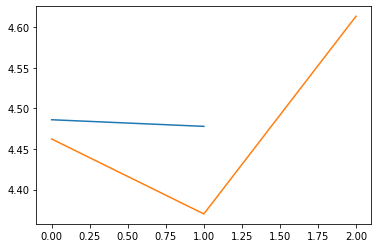

In [149]:
plt.plot([Marginal_Mean_Food,Marginal_Mean_NonFood])
plt.plot([Marginal_Mean_Low,Marginal_Mean_Med,Marginal_Mean_High])

In [150]:
#Compute degrees of freedom for SSA, SSB, SSAB and SSE
r=2
c=3
n=len(dataframe_ob_two)
#SSA=r-1
dof_SSA=r-1
#SSB=c-1
dof_SSB=c-1
#SSAB=(𝑟−1)(𝑐−1)
dof_SSAB=(r-1)*(c-1)
#SSE=𝑟𝑐(𝑛' −1)
dof_SSE=r*c*(n-1)

print('For factor material variation, degrees of freedom is', dof_SSA )
print('For factor temperature variation, degrees of freedom is', dof_SSB )
print('For interaction variation, degrees of freedom is', dof_SSAB )
print('For random variation, degrees of freedom is', dof_SSE )

For factor material variation, degrees of freedom is 1
For factor temperature variation, degrees of freedom is 2
For interaction variation, degrees of freedom is 2
For random variation, degrees of freedom is 264


critical value is 3.876923576999537
critical value is 3.029984887407855
critical value is 3.029984887407855


Text(2.729984887407855, 0.15, 'Critical Value is 3.03')

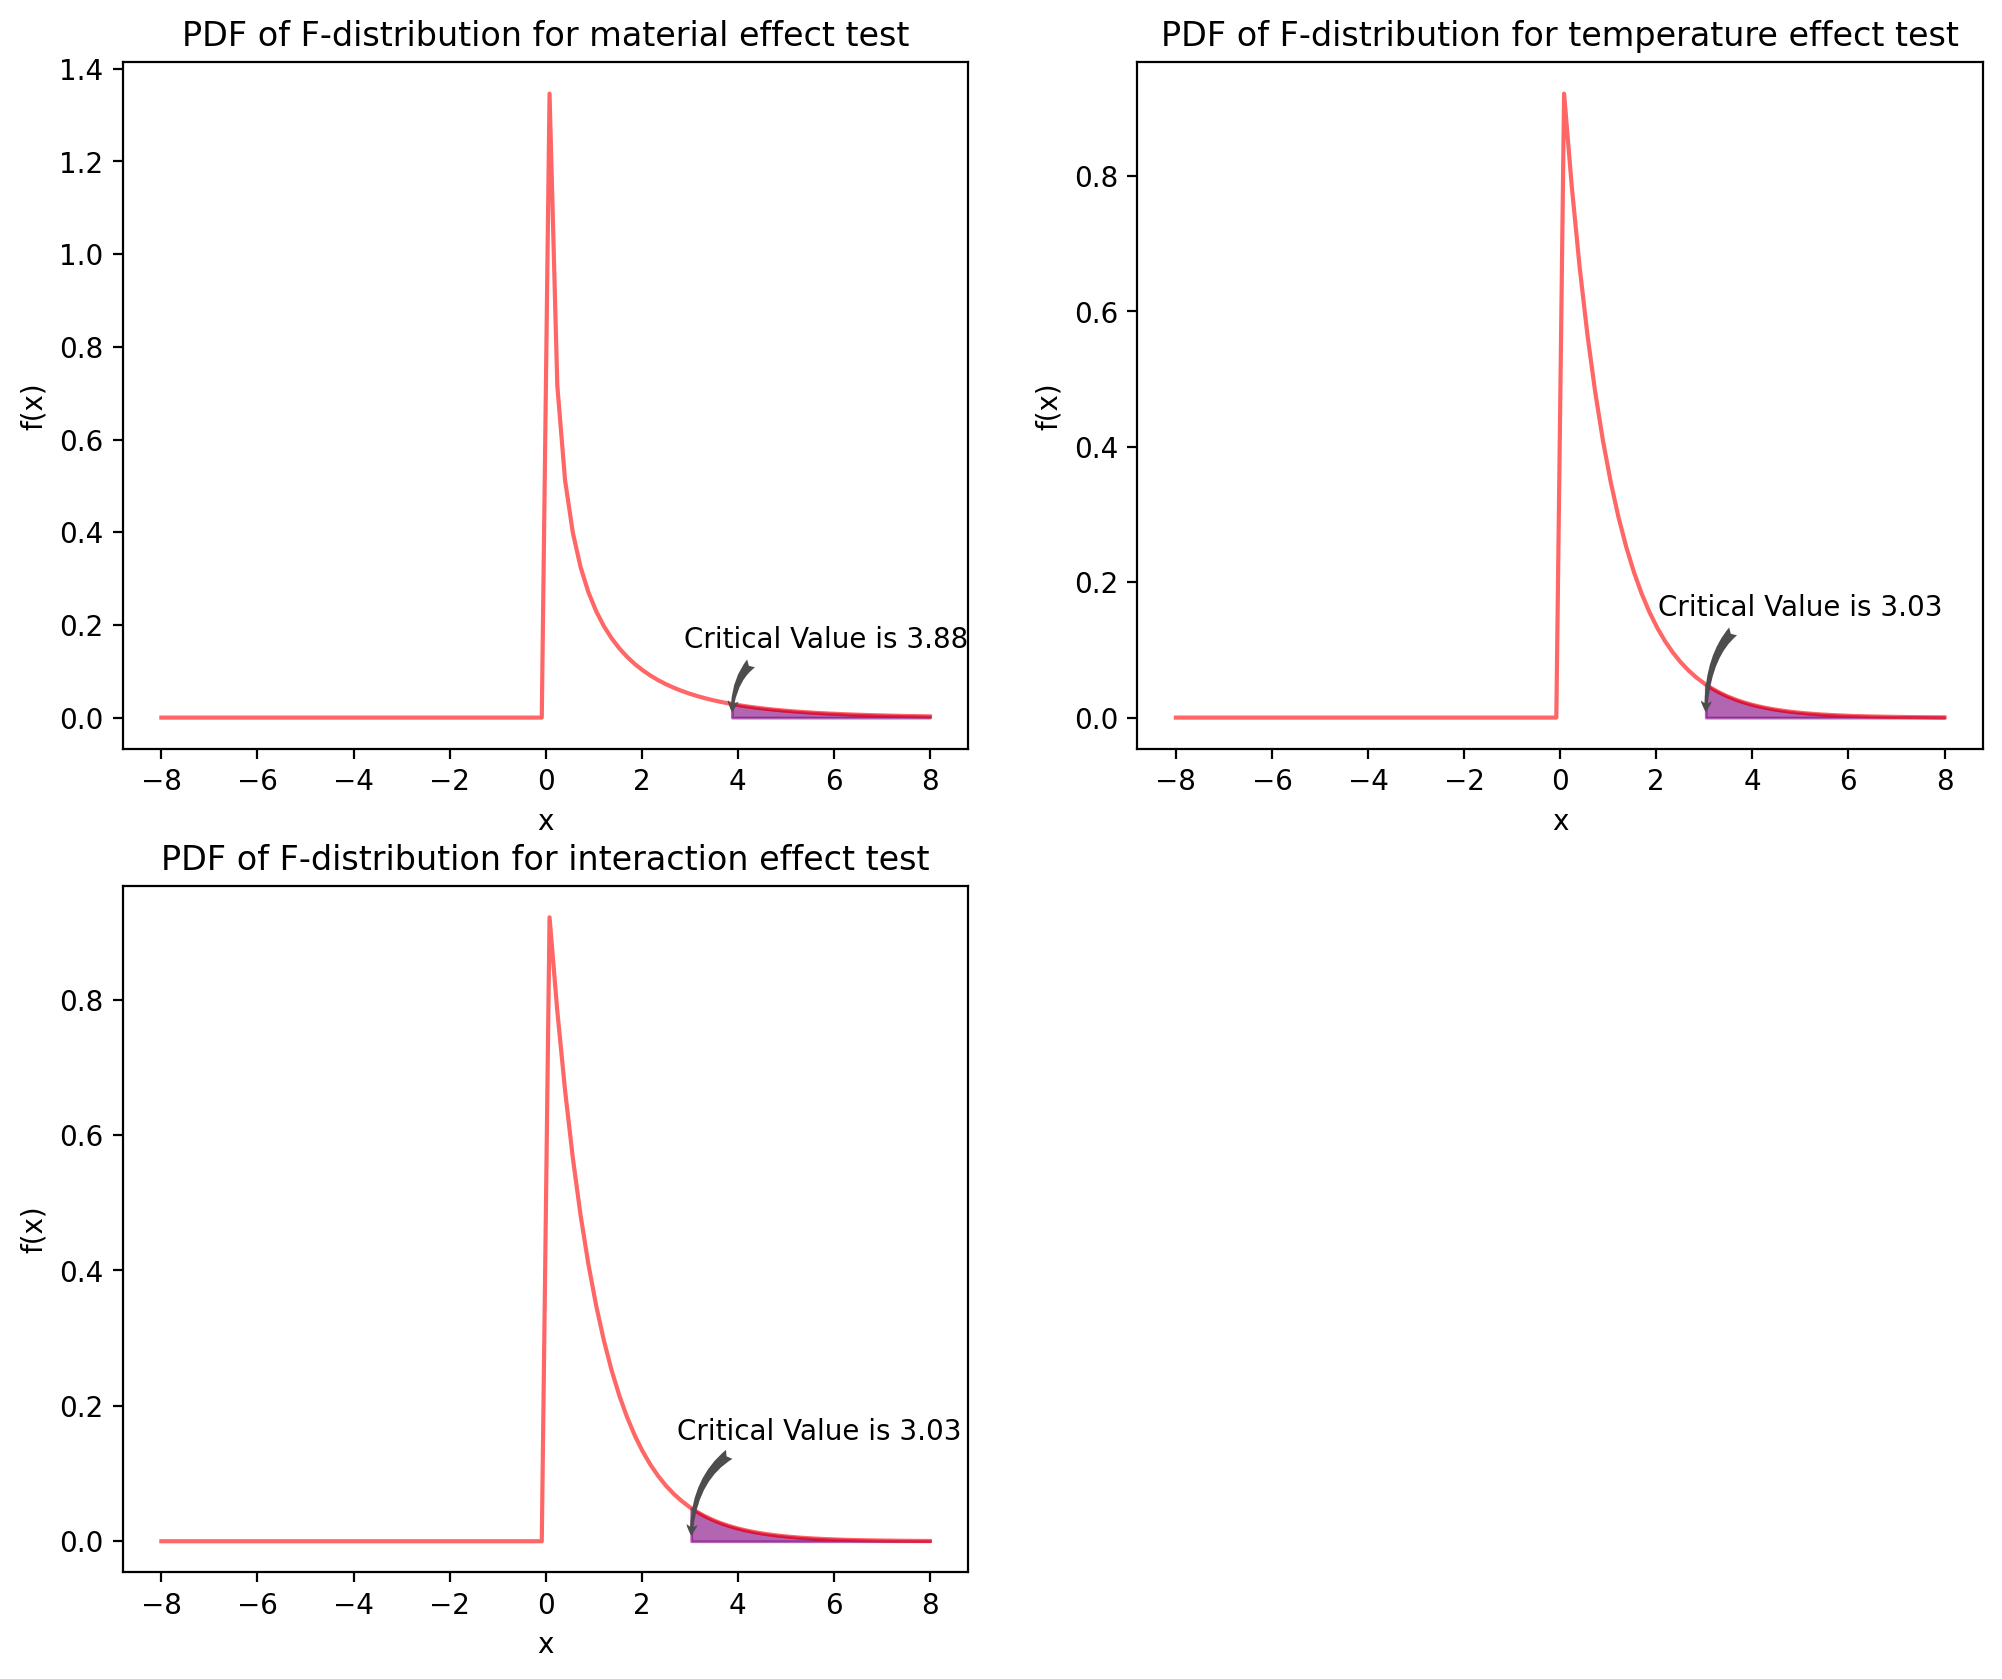

In [151]:
# Given a Type I error 5%, use the inverse function of CDF of F-distribution to compute critical value(s) of one-sided critical regions for factor and interaction effects

import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np


#generate a figure with size 12 in x 8 in and dpi=200
fig_two = plt.figure(figsize=(12, 10), dpi=200)
#the figure has 2 x 2 layout

ax1_two=fig_two.add_subplot(2,2,1)
ax2_two=fig_two.add_subplot(2,2,2)
ax3_two=fig_two.add_subplot(2,2,3)

#ax1 is the first subplot, showing the critical region of material effect test
x11 = np.linspace(-8, 8, 100)
ax1_two.plot(x11, sts.f.pdf(x11,dof_SSA, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax1_two.set_title('PDF of F-distribution for material effect test')
ax1_two.set_ylabel('f(x)')
ax1_two.set_xlabel('x')

C_value_material=sts.f.ppf(0.95, dof_SSA, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_material)
x12= np.linspace(C_value_material,8, 100)
ax1_two.fill_between(x12, sts.f.pdf(x12,dof_SSA, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax1_two.annotate(f'Critical Value is {round(C_value_material,2)}',(C_value_material,0),(C_value_material-1,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))


#ax2 is the second subplot, showing the critical region of temperature effect test
x21 = np.linspace(-8, 8, 100)
ax2_two.plot(x21, sts.f.pdf(x21,dof_SSB, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax2_two.set_title('PDF of F-distribution for temperature effect test')
ax2_two.set_ylabel('f(x)')
ax2_two.set_xlabel('x')

C_value_temperature=sts.f.ppf(0.95, dof_SSB, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_temperature)
x22= np.linspace(C_value_temperature,8, 100)
ax2_two.fill_between(x22, sts.f.pdf(x22,dof_SSB, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax2_two.annotate(f'Critical Value is {round(C_value_temperature,2)}',(C_value_temperature,0),(C_value_temperature-1,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

#ax3 is the third subplot, showing the critical region of interaction effect test
x31 = np.linspace(-8, 8, 100)
ax3_two.plot(x31, sts.f.pdf(x31,dof_SSAB, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax3_two.set_title('PDF of F-distribution for interaction effect test')
ax3_two.set_ylabel('f(x)')
ax3_two.set_xlabel('x')


C_value_interation=sts.f.ppf(0.95, dof_SSAB, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_interation)
x32= np.linspace(C_value_interation,8, 100)
ax3_two.fill_between(x32, sts.f.pdf(x32,dof_SSAB, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax3_two.annotate(f'Critical Value is {round(C_value_interation,2)}',(C_value_interation,0),(C_value_interation-0.3,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

In [152]:
# Calculate the test statistic for factor and interaction effects and make the decision.
Marginal_Mean_Name = [Marginal_Mean_Food,Marginal_Mean_NonFood]
Marginal_Mean_Price = [Marginal_Mean_Low,Marginal_Mean_Med,Marginal_Mean_High]

# because the sample sizes in all combination are 4, grand mean can be computed by using either marginal means for material or marginal means for temperature  
grand_mean_two=np.mean(Marginal_Mean_Name)
# compute SSA 
SSA_material=0
for i in range(2):
    SSA_material=SSA_material+(Marginal_Mean_Name[i]-grand_mean_two)**2
SSA_material=SSA_material*3*4

# compute SSB 
SSB_temperature=0
for j in range(3):
    SSB_temperature=SSB_temperature+(Marginal_Mean_Price[j]-grand_mean_two)**2
SSB_temperature=SSB_temperature*3*4

# compute SSAB 
SSAB=0
for i in [0,2,4]:
    SSAB=SSAB+(np.mean(dataframe_ob_two.values[:,i])-Marginal_Mean_Name[int(i/3)]-Marginal_Mean_Price[0]+grand_mean_two)**2
    SSAB=SSAB+(np.mean(dataframe_ob_two.values[:,i+1])-Marginal_Mean_Name[int(i/3)]-Marginal_Mean_Price[1]+grand_mean_two)**2
    SSAB=SSAB+(np.mean(dataframe_ob_two.values[:,i+2])-Marginal_Mean_Name[int(i/3)]-Marginal_Mean_Price[2]+grand_mean_two)**2
SSAB=SSAB*4

# compute SSE
SSE=0
for i in range(3):
    for k in range(n):
        SSE=SSE+(dataframe_ob_two.values[k,i]-np.mean(dataframe_ob_two.values[:,i]))**2
        SSE=SSE+(dataframe_ob_two.values[k,i+1]-np.mean(dataframe_ob_two.values[:,i+1]))**2
        SSE=SSE+(dataframe_ob_two.values[k,i+2]-np.mean(dataframe_ob_two.values[:,i+2]))**2
            

# compute test statistic for material effect
test_statistic_material=(SSA_material/dof_SSA)/(SSE/dof_SSE)
print('The test statistic for material effect is', test_statistic_material)
print('reject null hypothesis')
# compute test statistic for temperature effect 
test_statistic_temperature=(SSB_temperature/dof_SSB)/(SSE/dof_SSE)
print('The test statistic for temperature effect  is', test_statistic_temperature)
print('reject null hypothesis')

# compute test statistic for interation effect 
test_statistic_interation=(SSAB/dof_SSAB)/(SSE/dof_SSE)
print('The test statistic for interation effect  is', test_statistic_interation)
print('reject null hypothesis')

print('there is strong evidence that the mean battery life varies with material and temperature factors')
print('battery life changes for different materials depends on both temperature and material')

IndexError: index 6 is out of bounds for axis 1 with size 6

In [ ]:
# two factor effect are significant,so we perform Tukey-Kramer procedure.
# Step 1: Compute pairwise absolute difference between marginal sample means of factors material and temperature
Pair_Diff_material=np.zeros((2,3))
Pair_Diff_temperature=np.zeros((2,3))
#compute the pairwise absolute difference for distinctive pairs
for i in range(2):
    for j in range(3):
        if  i > j :
            Pair_Diff_material[i,j]=abs(Marginal_Mean_Name[i]-Marginal_Mean_Name[j])
            Pair_Diff_temperature[i,j]=abs(Marginal_Mean_Price[i]-Marginal_Mean_Price[j])

            
# Step 2: Given Type I error 5% , compute the critical region for factor material and temperature by the inverse function of CDF of studentized range distribution
# for the use of studentized range distribution, refer to https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.studentized_range.html
# 1st para: 1-alpha
# 2nd/3rd paras: two groups of degrees of freedom
# loc and scale=1 default settings
critical_value_material_TK= sts.studentized_range.ppf(0.95,dof_SSA,dof_SSE,loc=0, scale=1)*np.sqrt((SSE/dof_SSE)/(c*n))
critical_value_temperature_TK= sts.studentized_range.ppf(0.95,dof_SSB,dof_SSE,loc=0, scale=1)*np.sqrt((SSE/dof_SSE)/(r*n))
# Step 3: Compare each pairwise absolute difference with the corresponding critical values.

for i in range(2):
    for j in range(3):
        if  i > j :
            if Pair_Diff_material[i,j]>critical_value_material_TK:
                print('there is a significant difference in population mean between groups',i,'and',j, 'of factor material.')
            else:
                print('there is no difference in population mean between groups',i,'and',j, 'of factor material.')
            if Pair_Diff_temperature[i,j]>critical_value_temperature_TK:
                print('there is a significant difference in population mean between groups',i,'and',j, 'of factor temperature.')
            else:
                print('there is no difference in population mean between groups',i,'and',j, 'of factor temperature.')
        

In [ ]:
Pair_Diff_material

In [ ]:
Marginal_Mean_Name

In [ ]:
Marginal_Mean_Price

# 5.Correlation Relationship Between Two Discrete Variables

In [ ]:
pd.crosstab(df['score'], df['is_food'],margins=True)

In [ ]:
pd.crosstab(df['price_range'], df['is_food'],margins=True)

In [ ]:
pd.crosstab(df['score'], df['price_range'],margins=True)

# 6.Correlation Relationship Between Two Continuous Variables

In [ ]:
correlation_matrix = df.loc[:,['position','score','ratings','price_range','lat','lng','is_food']].corr()
print(correlation_matrix)

In [ ]:
# use pairplot() from seaborn to generate scatter plots to visualise correlation. This is a basic correlogram
sns.pairplot(df.loc[:,['position','score','ratings','price_range','lat','lng','is_food']])
# save the plot in a JPG file named basic_correlogram.jpg, resolution 300
plt.savefig('picture/basic_correlogram.jpg', dpi=300)
plt.show()

In [ ]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # Exclude duplicate correlations by masking uper right values;triu(): Upper triangle of an array. #Add diverging colormap
sns.heatmap(correlation_matrix, mask=mask, cmap="rocket_r", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw correlation plot, color map option can be found https://seaborn.pydata.org/tutorial/color_palettes.html
# save the plot in a JPG file named basic_correlogram.jpg, resolution 300
plt.savefig('picture/heatmap_correlogram.jpg', dpi=300)  
plt.show()

# 7.Causation Between Two Continuous Variables

In [ ]:
##Demo 3.1 & Demo 3.2 cont.
#set learning rate to be 0.001

# Converting data to array for later calculations
x_train = np.array(df.score)
y_train = np.array(df.ratings)
 
n = len(x_train)  # Number of samples in data
 
iter = 0  # Initial iteration counter
itersteps = 200  # Total number of iterations
 
# Initial guesses for linear regression model of y=betax+alpha and arrays to keep track of values over iterations
alpha = np.zeros(itersteps)
beta = np.zeros(itersteps)
F = np.zeros(itersteps)
dFdalpha = np.zeros(itersteps)
dFdbeta = np.zeros(itersteps)
SQ_Regression = np.zeros(itersteps)
SQ_Error = np.zeros(itersteps)
SQ_Total = np.zeros(itersteps)
R_sq = np.zeros(itersteps)
 
a = 0.0001    # Step size as smaller as possible!
 
# Gradient Descent implementation on the linear regression model
while iter < itersteps - 1:
    y_new = beta[iter] * x_train + alpha[iter]
 
    F[iter] = 1/n* np.sum((y_train - y_new) ** 2)  # Least Sqaure
 
    dFdbeta[iter] = 1/n*np.sum((y_train - y_new) * -2 * x_train)
    dFdalpha[iter] = 1/n* np.sum((y_train - y_new) * -2)
 
    SQ_Regression[iter] = np.sum((y_new - np.mean(y_train)) ** 2)
    SQ_Error[iter] = np.sum((y_train - y_new) ** 2)
    SQ_Total[iter] = np.sum((y_train - np.mean(y_train)) ** 2)
    R_sq[iter] = 1- SQ_Error[iter]/SQ_Total[iter] # Tracking R^2
 
    alpha[iter + 1] = alpha[iter] - a * dFdalpha[iter]  # Update equation for alpha
    beta[iter + 1] = beta[iter] - a * dFdbeta[iter] # Update equation for beta
    iter += 1
    
print('Final alpha is',alpha[iter-1])
    
print('Final beta is',beta[iter-1])

print('Final R^2 is',R_sq[iter-1])

plt.plot(range(len(SQ_Error)-1), SQ_Error[0:iter], label='SQ_Error', color='blue')
plt.plot(range(len(SQ_Regression)-1), SQ_Regression[0:iter], label='SQ_Regression', color='red')
plt.legend(loc="best")
plt.ylabel('Sum of Sqaures')
plt.xlabel('Iteration')

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
X = df[['position','ratings','price_range','lat','lng','is_food']]
Y= df['score']
# add intercept, default option goes without intercept
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

#### Summary of OLS:
Adj. R-squared:0.0.051 0.187 would mean our model explains 5.1% of the change in our 'score' variable.

P-value: p-values represent the probability of the coefficient values being 0

Omnibus describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy.

Prob(Omnibus):Prob(Omnibus) is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution.

Durbin-Watson is a measurement of homoscedasticity, or an even distribution of errors throughout our data. Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal homoscedasticity will lie between 1 and 2. 

source:
https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

In [ ]:
##Independence of residuals: residuals should be independent from the others.
##We need to compute those residuals by using the previous results 
##Let us use the gradient descent's alpha and beta...
from statsmodels.stats.stattools import durbin_watson

Residuals= model.resid

#compare Durbin-Watson statistic with 2. If Durbin-Watson statistic is close to 2, then accept the null hypothesis that residuals are independent.
print('Durbin-Watson statistic is ', durbin_watson(Residuals))

In [ ]:
##Normality of residuals: residuals are normally distributed

import matplotlib.pyplot as plt 
import scipy.stats as sts 
import numpy as np 

#Perform the Chi-squared goodness of fit test to check the normality assumption under type I error 5%.

#We know that a random variable that follows normal distribution is continuous.

#For Chi-squared goodness of fit test, the test statistic is summing the squared difference between the observed frequency and the expected frequency of an outcome. #Continuous normal distribution means a infinite number of outcomes.

#Hence, we should discretise the continuous normal distribution by using bins/sub-regions.

mean_Residuals=np.mean(Residuals) 
var_Residuals=np.var(Residuals,ddof=1) #ddof is delta degree of freedom, ddof=1: using sample mean formula mean_G[0,0]= np.mean(Group1) var_G[0,0]= np.var(Group1,ddof=1)

#Cutoffs for those bins can be found via the inverse function of CDF #21 bins require 20 cutoffs.

Bin_Cutoff=np.zeros(20)

for i in range(20):
    Bin_Cutoff[i]=sts.norm.ppf((i+1)/21,loc=mean_Residuals,scale=np.sqrt(var_Residuals)) #all bins have equal probabilities, the sum is 1. 

Expected_Relative_Freq=1/21*np.ones(21)

#Compute the observed absolute frequency for each bin by counting the number of sample points in each bin 
Observed_Absolute_Freq=np.zeros(21)

Observed_Absolute_Freq[0]=len(np.where(Residuals <= Bin_Cutoff[0])[0]) 
for i in range(1,20):
    Observed_Absolute_Freq[i]=len(np.where(Residuals <= Bin_Cutoff[i])[0])-np.sum(Observed_Absolute_Freq[0:i])

Observed_Absolute_Freq[20]=len(Residuals)-np.sum(Observed_Absolute_Freq[0:21])
Expected_Absolute_Freq=Expected_Relative_Freq*len(Residuals)
print('p-value of Chi-squared goodness of fit test is', sts.chisquare(Observed_Absolute_Freq,Expected_Absolute_Freq,ddof=2)[1]) 
#print('null hypothesis for group online should be retained, as p-value> 5% ')
print('null hypothesis for group online should be reject, as p-value < 5% ')

#Alternatively, generate a histogram to check this, the histogram can be integrated with a PDF curve
plt.hist(Residuals, bins= 20, color='Orange')
pltx=np.linspace(-10,7.5,200)
plt.plot(pltx,len(Residuals)*sts.norm.pdf(pltx,loc=mean_Residuals,scale=np.sqrt(var_Residuals)),color='red')
plt.title('Histogram of Residuals')
plt.ylabel('Absolute Frequency')
plt.xlabel('Value of Residual')

In [ ]:
#Equal variance: residuals for all values of independent variable 𝑋 should have equal variances.


#We can use scatter plot fitted values v.s. residuals
Y_fit = model.predict(X)
plt.scatter(Residuals,Y_fit)


#Use Levene's test to verify this
#Residuals are distributed in a one-dimension interval. Divide the interval into several sub-interval
#Find the upper and lower limit for the range of residuals.
#Bin approximation again....
#We divide the whole interval between Upper_limit and Lower_limit into 4 sub-intervals
#We want to see if samples in those sub-interval have equal variance by using levene test.

Upper_limit=max(Residuals)
Lower_limit=min(Residuals)
Range_Cutoff= np.linspace(Lower_limit,Upper_limit,4)

df1=pd.DataFrame({'sub_interval_1':Residuals[np.where(Residuals <= Range_Cutoff[0])[0]]})
df2=pd.DataFrame({'sub_interval_2':Residuals[np.where((Residuals > Range_Cutoff[0]) & (Residuals <= Range_Cutoff[1])) [0]] })
df3=pd.DataFrame({'sub_interval_3':Residuals[np.where((Residuals > Range_Cutoff[1]) & (Residuals <= Range_Cutoff[2])) [0]]})
df4=pd.DataFrame({'sub_interval_4':Residuals[np.where((Residuals > Range_Cutoff[2]) & (Residuals <= Range_Cutoff[3])) [0]]})

import scipy.stats as sts
print(sts.levene(df1.values[:,0],df2.values[:,0], df3.values[:,0],df4.values[:,0],center='median'))


##If we get remove outliers and set the lower limit to be -6, as from -6, there are sample points, then the null hypothesis will be accepted.
Upper_limit=max(Residuals)
Lower_limit=-6
Range_Cutoff= np.linspace(Lower_limit,Upper_limit,4)

df1=pd.DataFrame({'sub_interval_1':Residuals[np.where(Residuals <= Range_Cutoff[0])[0]]})
df2=pd.DataFrame({'sub_interval_2':Residuals[np.where((Residuals > Range_Cutoff[0]) & (Residuals <= Range_Cutoff[1])) [0]] })
df3=pd.DataFrame({'sub_interval_3':Residuals[np.where((Residuals > Range_Cutoff[1]) & (Residuals <= Range_Cutoff[2])) [0]]})
df4=pd.DataFrame({'sub_interval_4':Residuals[np.where((Residuals > Range_Cutoff[2]) & (Residuals <= Range_Cutoff[3])) [0]]})

import scipy.stats as sts
print(sts.levene(df1.values[:,0],df2.values[:,0], df3.values[:,0],df4.values[:,0],center='median'))

In [ ]:
import matplotlib.pyplot as plt #画图的基础包
import seaborn as sns #画图的高级包
sns.pairplot(df, x_vars=['position','ratings','price_range','lat','lng','is_food'], y_vars='score', kind='reg', height=10, aspect=1)
plt.show()

# Learn

In [ ]:
#dataFram/reindex(range(len),method='ffill')
'''
reindex(method)给NaN赋值
method = ‘ffill’/ ‘pad’: 根据前面的值填充
method = ‘bfill’/ ‘backfill’: 根据后面的值填充
'''
#dataFram.reindex(columns=['','',''])

In [ ]:
import pandas as pd
import numpy as np
Chi_Sq_statistic=0
k=2
l=3
for i in range(k):
    for j in range(l):
        #df_obj4.values[i,3] is row total i; df_obj4.values[2,j] is column total j; df_obj4.values[2,3] is the total number
        Chi_Sq_statistic=Chi_Sq_statistic+ (df_obj4.values[i,j] - df_obj4.values[i,3] * df_obj4.values[2,j]/df_obj4.values[2,3])**2/(df_obj4.values[i,3] * df_obj4.values[2,j]/df_obj4.values[2,3])
#2 is the number of rows, 3 is the number of columns
#np.minimum(2,3) to compute the minimum of 2 and 3.
V_statistic=np.sqrt(Chi_Sq_statistic/(df_obj4.values[2,3]*(np.minimum(2,3)-1)))

#V statistic is in range between 0 and 1. 0,49 is showing moderate correlation
print('Pearson chi-squared statistic is',Chi_Sq_statistic)
print('Cramér V statistic is',V_statistic )

In [ ]:
from scipy import stats
x=df[(df.is_food == 1) & (df.price_range > 1)].score.values
shapiro_test = stats.shapiro(x)
shapiro_test

In [ ]:
df[(df.is_food == 1) & (df.price_range == 1)].values
print(len(df[(df.is_food == 0) & (df.price_range > 1)]))
print(len(df[(df.is_food == 1) & (df.price_range > 1)]))
print(len(df[(df.is_food == 0) & (df.price_range == 1)]))